# UB DataScience: Complex networks
### David Solans & Gerard Martinez

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
from networkx.algorithms import community
import collections
import numpy as np
import pickle
import operator
import folium
from scipy.optimize import curve_fit

plt.style.use('seaborn')

%matplotlib inline

## Loading data

In [2]:
G_transport = nx.read_edgelist("barcelona_transport.edgelist", create_using = nx.Graph(), nodetype = int)
G_bus = nx.read_edgelist("barcelona_bus.edgelist", create_using = nx.Graph(), nodetype = int)
G_metro = nx.read_edgelist("barcelona_metro.edgelist", create_using = nx.Graph(), nodetype = int)

In [3]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
bus_stations_properties = load_obj("bus_stations_properties")

In [5]:
# Robustness


In [6]:
# Nodes cutting

In [7]:
degree_pearson_correlation=[]
for g in nx.connected_component_subgraphs(G_bus): 
    degree_pearson_correlation.append(nx.degree_pearson_correlation_coefficient(g)) 

In [8]:
print("Similarity of connections in the graph with respect to the node degree per connected component: {}".format(degree_pearson_correlation))

Similarity of connections in the graph with respect to the node degree per connected component: [0.14105372358145282, 0.23333333333333317, 0.27694090382387021]


In [9]:
# Correlations
#Degree correlations
print("Similarity of connections in the graph with respect to the node degree: ",nx.degree_pearson_correlation_coefficient(G_bus))

Similarity of connections in the graph with respect to the node degree:  0.153140975193


In [10]:
# Assortativity
print("Degree assortativity of the graph: ",nx.degree_assortativity_coefficient(G_bus))
#print("Assortativity for node attributes: ",nx.attribute_assortativity_coefficient(G_bus))
#print("Assortativity for numerical node attributes: ",nx.numeric_assortativity_coefficient(G_bus))
print("Degree assortativity of graph: ",nx.degree_pearson_correlation_coefficient(G_bus))

Degree assortativity of the graph:  0.153140975193
Degree assortativity of graph:  0.153140975193


In [11]:
#average_neighbor_degree =[]
#for g in nx.connected_component_subgraphs(g): 
#    average_neighbor_degree.append(nx.average_neighbor_degree(g)) 

#print(average_neighbor_degree)

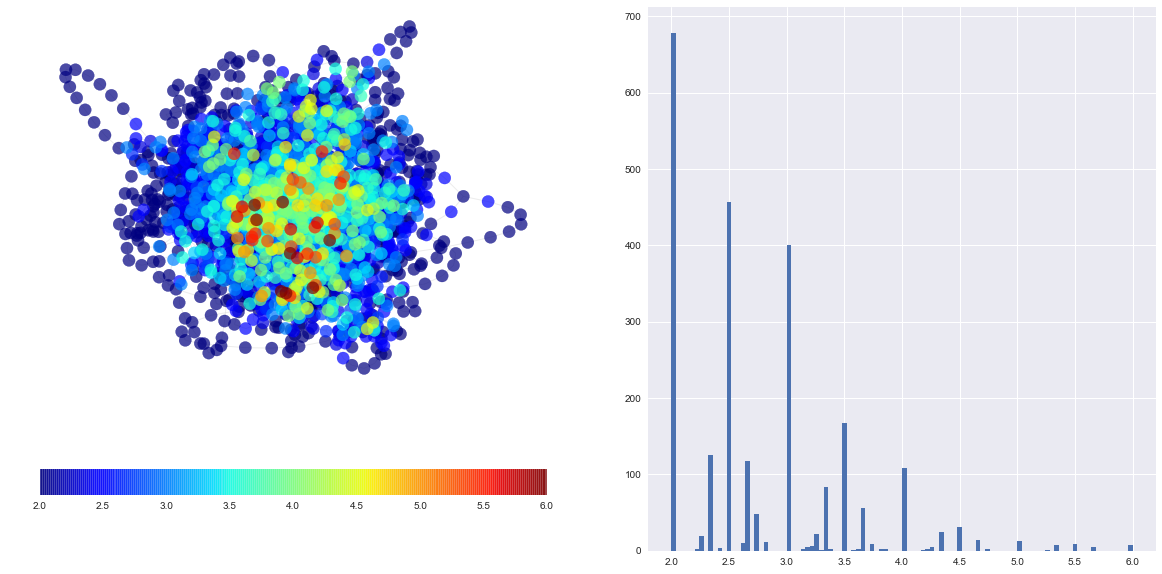

In [12]:
# Average neighbor degree
average_neighbor_degree = nx.average_neighbor_degree(G_bus)
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = average_neighbor_degree
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100)
plt.show()

### Assortativity:
Following class notes, the assortativity of the network can me analyzed by:

![Assortativity](assortativity.png)

In [13]:
x_2 = list(range(2,12))
x_2

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [14]:
nodes = G_bus.nodes()
x = []
y = []
for n in nodes:
    x.append(G_bus.degree(n))
    y.append(average_neighbor_degree[n])

a=2.271, b=-0.223


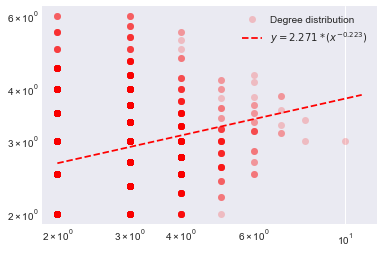

So the network seems to be assortative


In [24]:
#plt.plot(x, y, 'ro')

def func(x, a, b):
    return a *(x**(-b))

xdata = np.arange(2,11)

np.random.seed(1729)
#y_noise = 0.0002 * np.random.normal(size=xdata.size)
popt, pcov = curve_fit(func, x, y)
print('a=%5.3f, b=%5.3f' % tuple(popt))
      
      
## Log log plot        
plt.plot(x, y, 'ro', label='Degree distribution',alpha=0.2)
x_2 = list(range(2,12))
plt.plot(x_2,func(x_2, *popt), '--',color='red',label='$y=%.3f*(x^{%.3f})$'%tuple(popt))
plt.legend(loc='upper right')

plt.xscale('log')
plt.yscale('log')
plt.show()
print("So the network seems to be assortative")

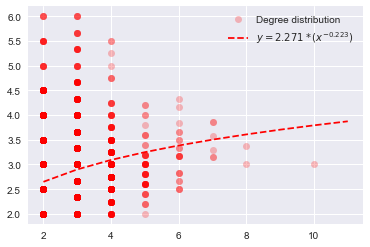

So the network has no structure?


In [25]:
#Linear 
plt.plot(x, y, 'ro', label='Degree distribution',alpha=0.25)
x_2 = list(range(2,12))
plt.plot(x_2,func(x_2, *popt), '--',color='red',label='$y=%.3f*(x^{%.3f})$'%tuple(popt))
plt.legend(loc='upper right')

plt.xscale('linear')
plt.yscale('linear')
plt.show()
print("So the network has no structure?")

In [16]:
np.unique(x)

array([ 2,  3,  4,  5,  6,  7,  8, 10])

In [53]:
mean=[]
stdvalues=[]
for i in np.unique(x):
    indices=np.argwhere(np.array(x)==i)
    nodesdegree=0
    compt=0
    averagenodedegreelist=[]
    for j in indices:
        nodesdegree=nodesdegree+float(y[j[0]])
        averagenodedegreelist.append(float(y[j[0]]))
        compt=compt+1
    mean.append(nodesdegree/compt)
    averagenodedegreelist=np.array(averagenodedegreelist)
    stdvalues.append(np.std(averagenodedegreelist))
    

In [18]:
mean

[2.610723350253807,
 3.0836120401337728,
 2.963443396226415,
 2.953846153846153,
 3.2045454545454546,
 3.4761904761904763,
 3.1875,
 3.0]

In [54]:
stdvalues

[0.70008555286688945,
 0.79626293884012223,
 0.65751887239130236,
 0.50629177452013341,
 0.50983216237549212,
 0.30491067797299282,
 0.1875,
 0.0]

a=0.049, b=2.783


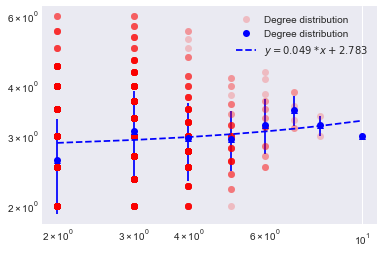

So the network seems to be assortative


In [61]:
def func(x, a, b):
    #return a *(x**(-b))
    return a*x+b
    

xdata = np.arange(2,11)
x_3=np.arange(2,11)      
x_3=np.delete(x_3,-2)  
np.random.seed(1729)
#y_noise = 0.0002 * np.random.normal(size=xdata.size)
popt, pcov = curve_fit(func, x_3, mean)
print('a=%5.3f, b=%5.3f' % tuple(popt))
    
## Log log plot        
plt.plot(x, y, 'ro', label='Degree distribution',alpha=0.2)
plt.plot(x_3, mean, 'bo', label='Degree distribution')
#Plot the error bars
plt.errorbar(x_3,mean, stdvalues,linestyle='None', marker='^',color='Blue')
x_2 = list(range(2,12))
#plt.plot(x_2,func(x_2, *popt), '--',color='red',label='$y=%.3f*(x^{%.3f})$'%tuple(popt))
plt.plot(x_3,func(x_3,popt[0],popt[1]), '--',color='blue',label='$y=%.3f*x+{%.3f}$'%tuple(popt))
plt.legend(loc='upper right')

plt.xscale('log')
plt.yscale('log')
plt.show()
print("So the network seems to be assortative")

### Random Networks

In [26]:
# Random graph with same number of nodes and links
# Compare radius
# Compare clustering
n = len(G_bus.nodes())
m = len(G_bus.edges())
G_2 = nx.gnm_random_graph(n,m)

In [29]:
print("BUS:\n",nx.info(G_bus))

node_radius_bus = [] 
for g in nx.connected_component_subgraphs(G_bus): 
    node_radius_bus.append(nx.radius(g)) 

print("Radius: ", node_radius_bus)
print("Mean radius: ", np.mean(node_radius_bus))


BUS:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330
Radius:  [20, 6, 14]
Mean radius:  13.3333333333


In [32]:
print("Gnm random:\n",nx.info(G_2))
node_radius_2 = []
compt=0
for g in nx.connected_component_subgraphs(G_2): 
    node_radius_2.append(nx.radius(g)) 
    compt+=1;
    
print('\nNumber of disconnected components:',compt)    
print("Radius: ", node_radius_2)
print("Mean radius: ", np.mean(node_radius_2))

Gnm random:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330

Number of disconnected components: 230
Radius:  [11, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mean radius:  0.152173913043


In [106]:
## We are interested in the the nodes of the first components
node_s= []
for g in nx.connected_component_subgraphs(G_bus):
    node_s.append(g.nodes())

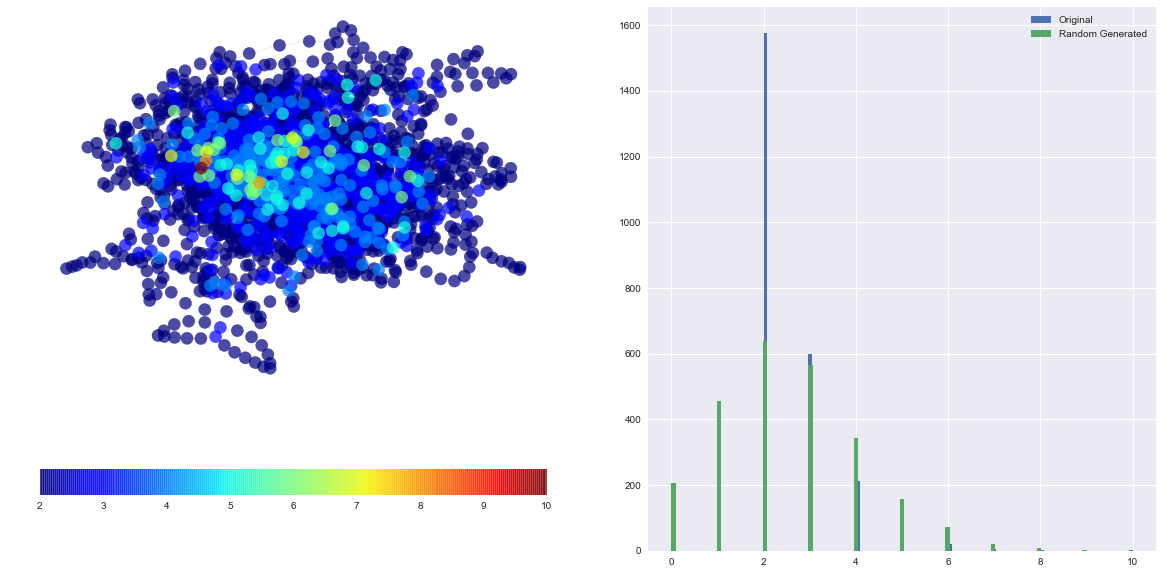

In [103]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(G_bus.degree)
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score2_array = np.array(list(dict(G_2.degree).values()))
plt.hist(score2_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Betwenness Centrality

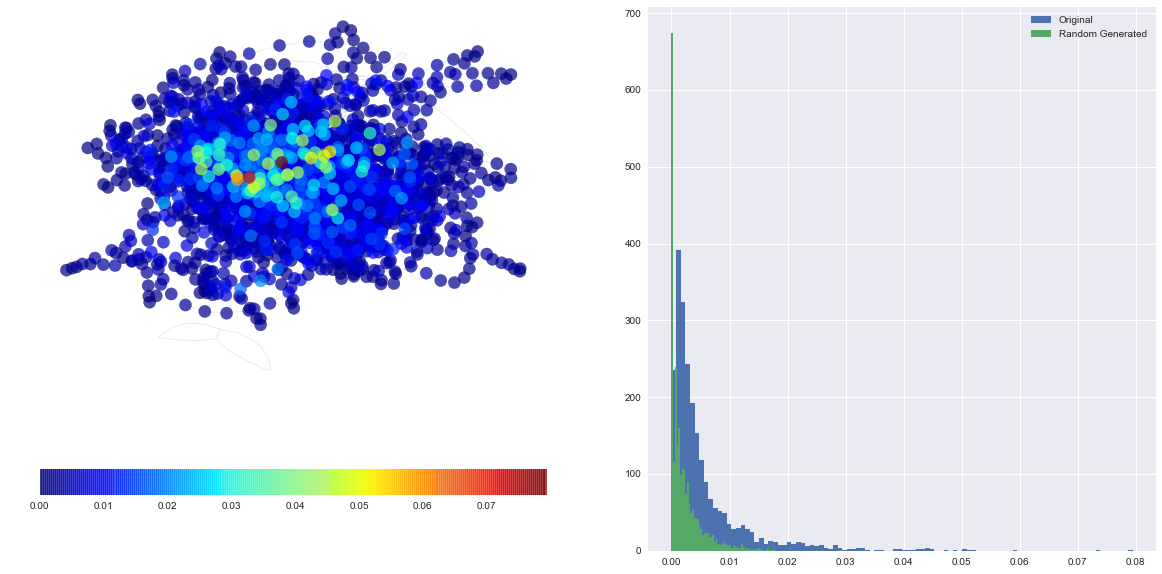

In [104]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_betweenness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score2_array = np.array(list(dict(nx.betweenness_centrality_source(G_2)).values()))
plt.hist(score2_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Closseness centrality

In [ ]:
## We are interested in the the betwenness centrality of the first components
node_closeness_centrality = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_closeness_centrality.append(nx.closeness_centrality(g))

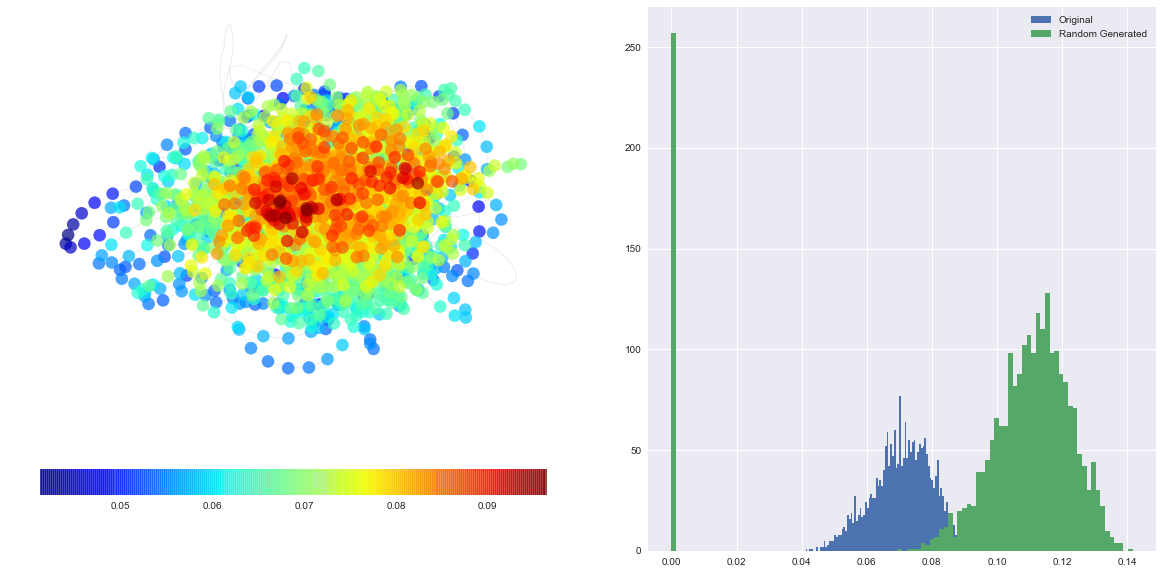

In [105]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_closeness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score2_array = np.array(list(dict(nx.closeness_centrality(G_2)).values()))
plt.hist(score2_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

###### Return a random graph with the given degree sequence.

The configuration model generates a random pseudograph (graph with parallel edges and self loops) by randomly assigning edges to match the given degree sequence.

In [41]:
#x contains the degree sequence for the bus network
G_3=nx.configuration_model(x)

## To remove parallel edges 
G_3=nx.Graph(G_3)

## To remove self loops:
G_3.remove_edges_from(G_3.selfloop_edges())

In [42]:
print("Gnm random:\n",nx.info(G_3))
node_radius_3 = []
compt=0
for g in nx.connected_component_subgraphs(G_3): 
    node_radius_3.append(nx.radius(g)) 
    compt+=1;
    
print('\nNumber of disconnected components:',compt)    
print("Radius: ", node_radius_3)
print("Mean radius: ", np.mean(node_radius_3))

Gnm random:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3123
Average degree:   2.5298

Number of disconnected components: 1
Radius:  [15]
Mean radius:  15.0


Node that as expected both networks have the same degree distribution

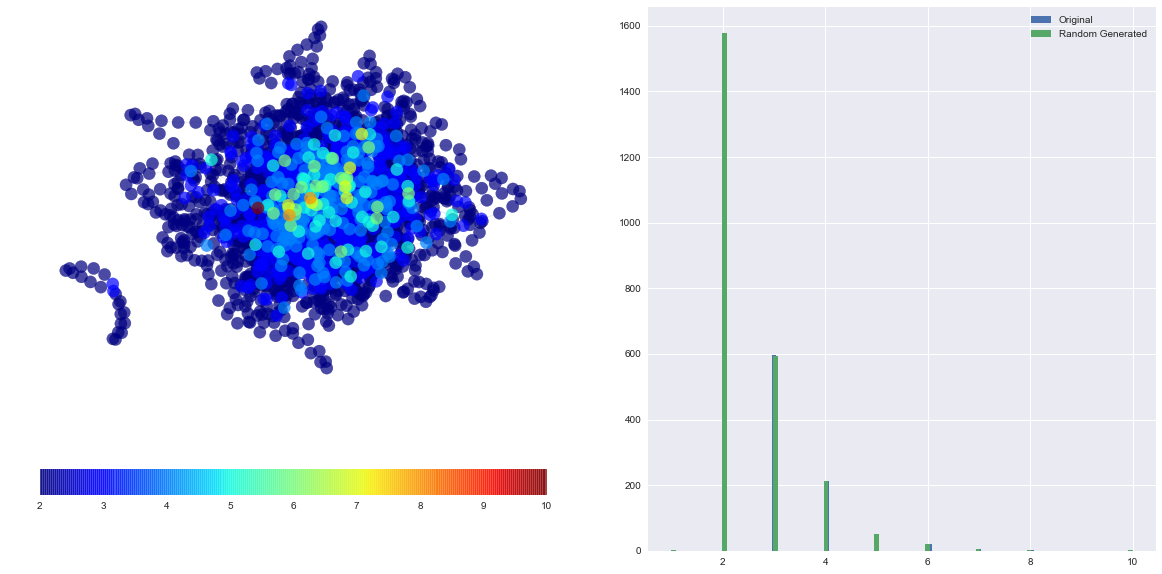

In [73]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(G_bus.degree)
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score3_array = np.array(list(dict(G_3.degree).values()))
plt.hist(score3_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Betwenness centrality

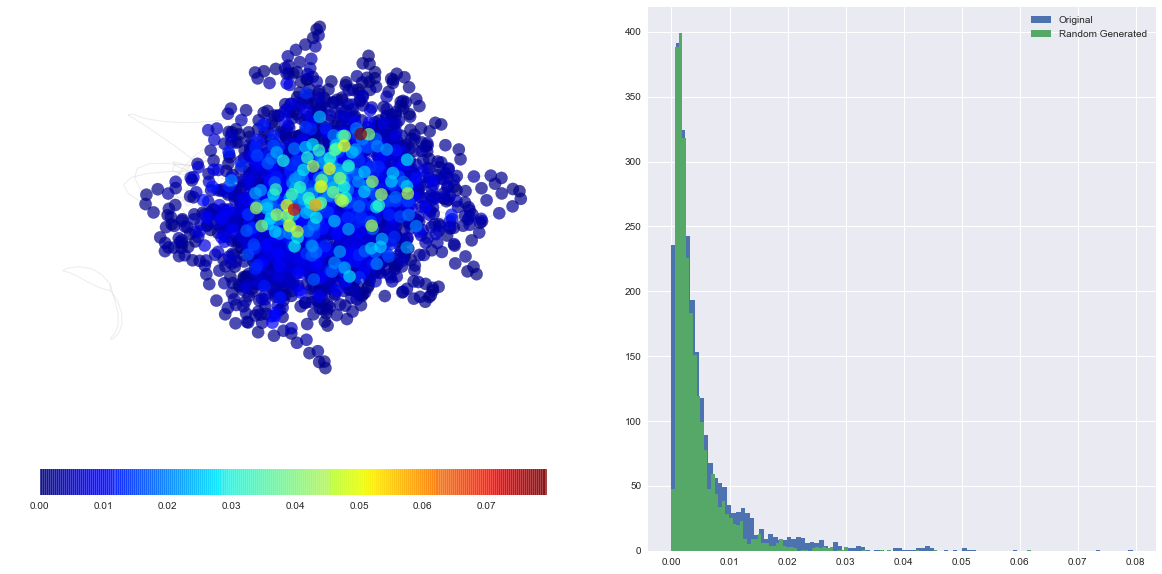

In [83]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_betweenness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score3_array = np.array(list(dict(nx.betweenness_centrality_source(G_3)).values()))
plt.hist(score3_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Closenness Centrality

In [ ]:
## We are interested in the the betwenness centrality of the first components
node_closeness_centrality = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_closeness_centrality.append(nx.closeness_centrality(g))

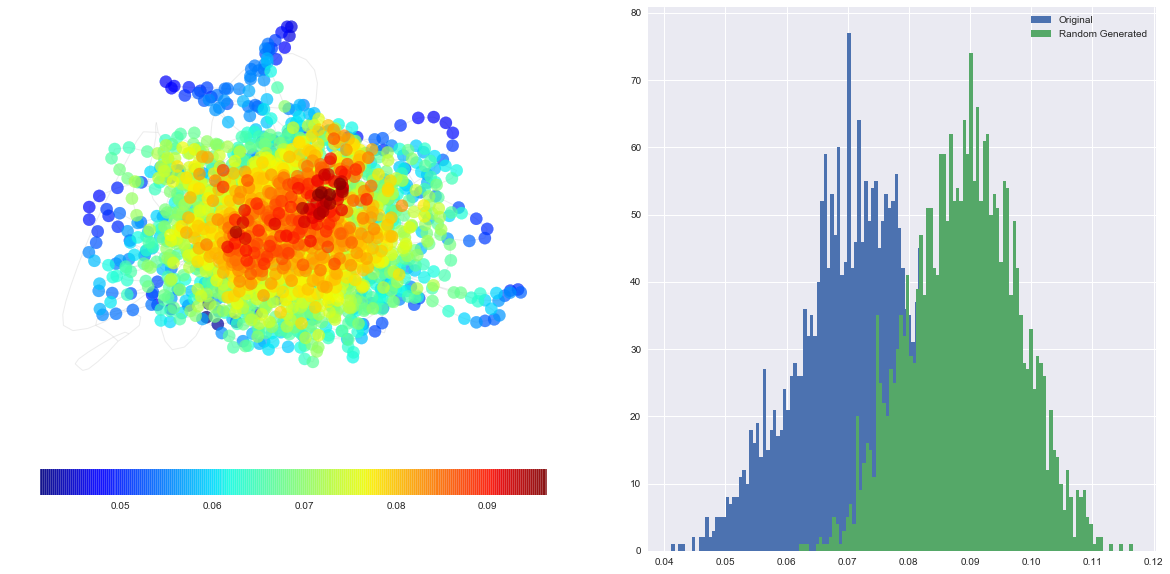

In [100]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_closeness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score3_array = np.array(list(dict(nx.closeness_centrality(G_3)).values()))
plt.hist(score3_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Let's check that average neighbor degree distribution.

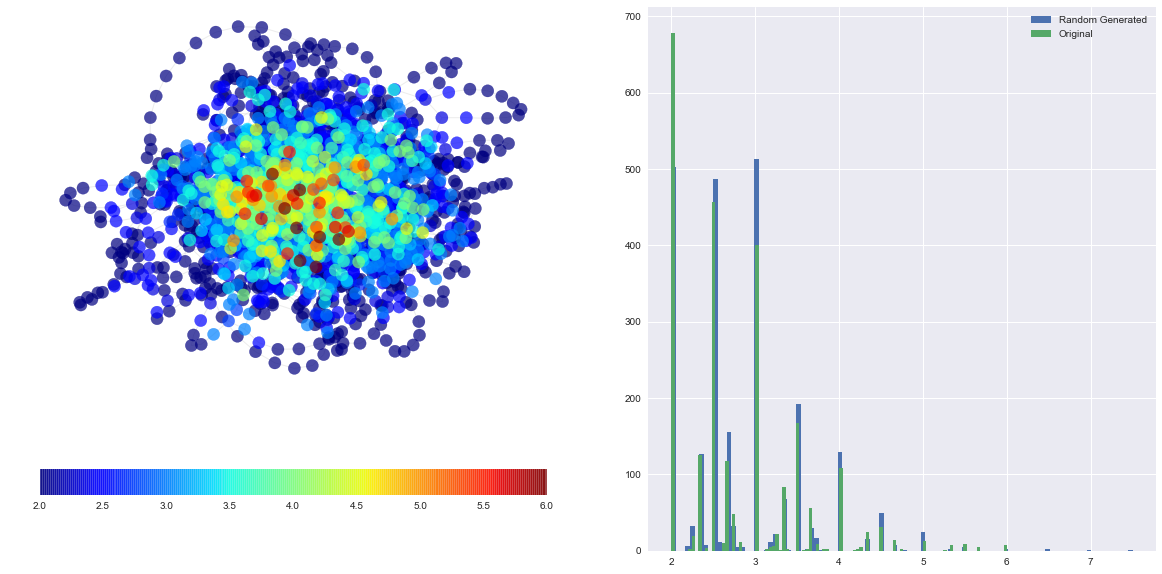

In [102]:
# Average neighbor degree
average_neighbor_degree3 = nx.average_neighbor_degree(G_3)
pos3 = nx.spring_layout(G_3)
average_neighbor_degree = nx.average_neighbor_degree(G_bus)
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = average_neighbor_degree
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')


plt.subplot(122)
score_array3 = np.array(list(scores3.values()))
plt.hist(score_array3,bins=100,label='Random Generated')
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
plt.legend(loc='upper right')
plt.show()

In [62]:
# Mean shortest path
# Average separation of nodes in bus
# nx.average_shortest_path_length(G)

node_distances_bus = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_distances_bus.append(nx.average_shortest_path_length(g)) 


print("Average separation per connected component: {}".format(node_distances_bus))
print("Average separation of nodes in bus network: {}".format(np.mean(node_distances_bus)))

Average separation per connected component: [14.307380464793308, 4.658008658008658, 10.227715355805243]
Average separation of nodes in bus network: 9.731034826202404


In [63]:
node_distances_bus = []
for g in nx.connected_component_subgraphs(G_3): 
    node_distances_bus.append(nx.average_shortest_path_length(g)) 
    
print("Average separation per connected component: {}".format(node_distances_bus))
print("Average separation of nodes in bus network: {}".format(np.mean(node_distances_bus)))

Average separation per connected component: [11.343408672728216]
Average separation of nodes in bus network: 11.343408672728216


###### Return a random graph generated using a possible edges with probability p

In [67]:
G_4=nx.erdos_renyi_graph(n, 0.001, seed=None, directed=False)

In [99]:
print("Gnm random:\n",nx.info(G_4))
node_radius_4 = []
compt=0
for g in nx.connected_component_subgraphs(G_4): 
    node_radius_4.append(nx.radius(g)) 
    compt+=1;
    
print('\nNumber of disconnected components:',compt)    
print("Radius: ", node_radius_4)
print("Mean radius: ", np.mean(node_radius_4))

Gnm random:
 Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3002
Average degree:   2.4318

Number of disconnected components: 240
Radius:  [13, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Mean radius:  0.15


Degree distribution

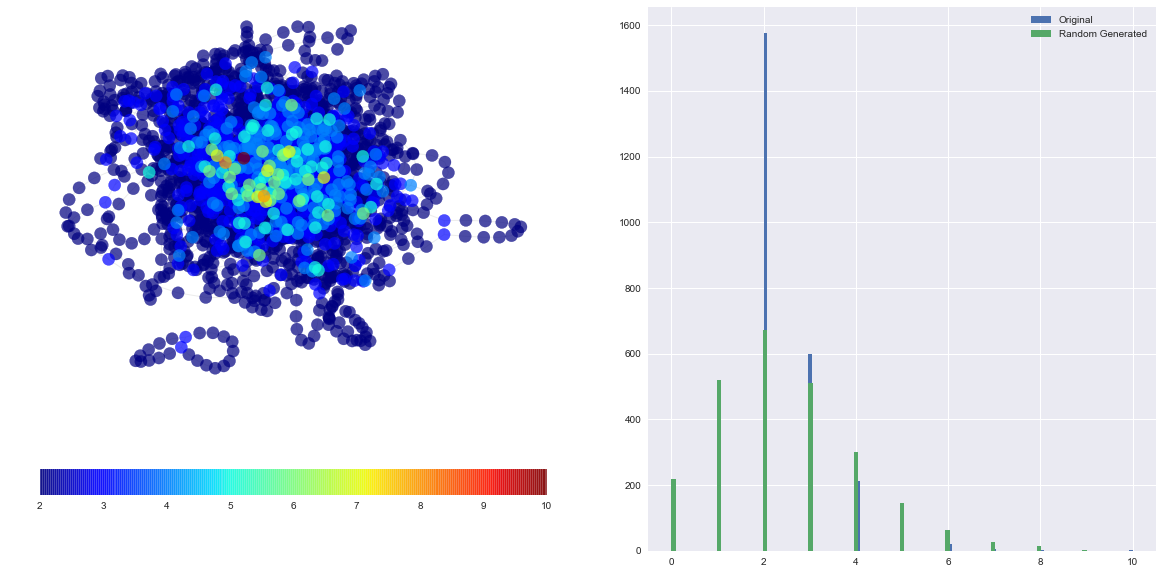

In [72]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(G_bus.degree)
nodelist = sorted(G_bus.nodes(), key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score4_array = np.array(list(dict(G_4.degree).values()))
plt.hist(score4_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Betwenness centrality

In [94]:
## We are interested in the the betwenness centrality of the first components
node_betweenness_centrality = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_betweenness_centrality.append(nx.betweenness_centrality_source(g))

In [95]:
## We are interested in the the nodes of the first components
node_s= []
for g in nx.connected_component_subgraphs(G_bus):
    node_s.append(g.nodes())

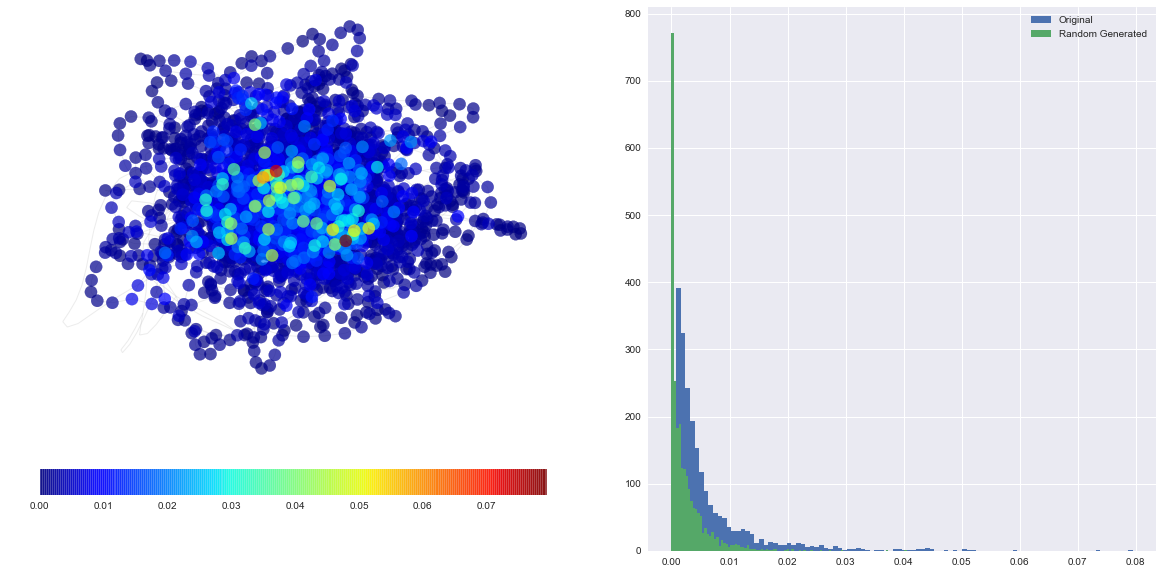

In [93]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_betweenness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score4_array = np.array(list(dict(nx.betweenness_centrality_source(G_4)).values()))
plt.hist(score4_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()

Closeness centrality

In [96]:
## We are interested in the the betwenness centrality of the first components
node_closeness_centrality = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_closeness_centrality.append(nx.closeness_centrality(g))

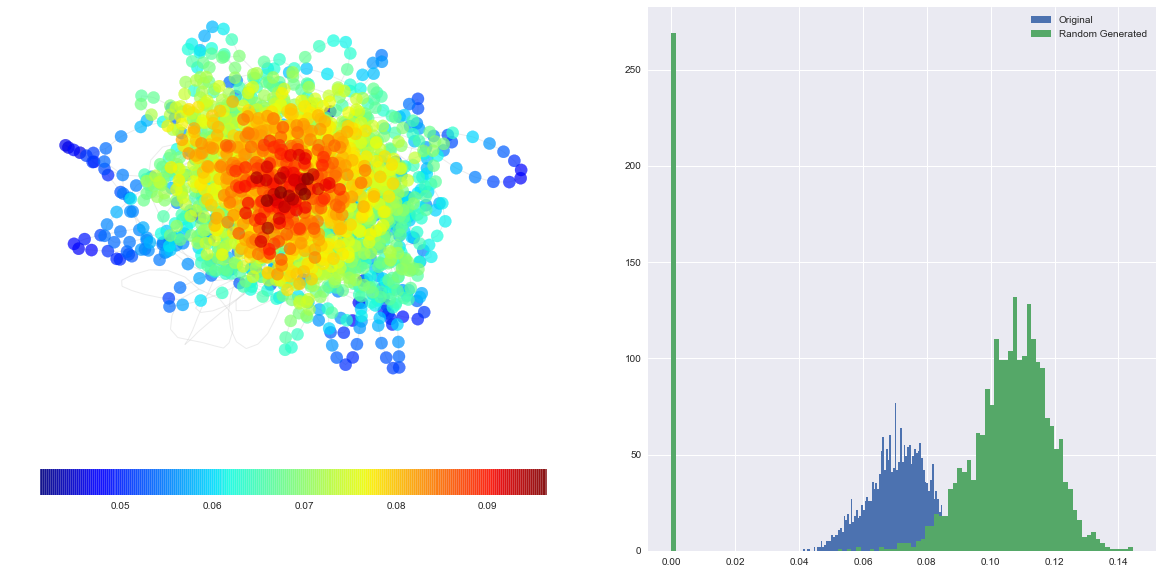

In [98]:
pos = nx.spring_layout(G_bus)
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.axis('off')
nx.draw_networkx_edges(G_bus, pos=pos, edge_color='#c1c1c1', alpha=.3)
scores = dict(node_closeness_centrality[0])
nodelist = sorted(node_s[0], key=lambda n: scores[n])
ncolor = np.asarray([scores[n] for n in nodelist])
nodes = nx.draw_networkx_nodes(G_bus, nodelist=nodelist, pos=pos, node_size=150, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

plt.subplot(122)
score_array = np.array(list(scores.values()))
plt.hist(score_array,bins=100,label='Original')
score4_array = np.array(list(dict(nx.closeness_centrality(G_4)).values()))
plt.hist(score4_array,bins=100,label='Random Generated')
plt.legend(loc='upper right')
plt.show()